
# About



Our Project's goal was to supply health proffesionals with relevant statistics to inform policy-making in relation to the health sector. Additionally, we are attempting to dissect the relationships between an individual's concern of their health and various socioeconomic factors. We formatted out code in the following form.

1. Getting Data
     - here we load data from csv files and import relevant libraries
2. Data Preprocessing
    - Remove irrelevant columns and impute null values

3. Data Exploratory Analysis
      - this section focuses on finding patterns between various columns in our data set to illustrate previously unknown patterns in our data
4. Data Cleaning
      - In this section we focused on cleaning our data to prepare for modeling our data.
5. Modeling
      - Here we focused on modeling data with binary classification through a logistic model and a sequential neural network model.

# Getting Data

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import geopandas as gpd
import matplotlib.colors as mcolors


In [75]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:

consumer_df = pd.read_csv('/content/drive/MyDrive/Datathon/IrvineHacks_ConsumerData/ConsumerData.csv')



In [77]:
consumer_df.head()

,RecordID,MAK,BaseMak,Address,City,State,Zipcode,Latitude,Longitude,OwnerRenter,HomePurchaseDate,Charitable,Health,Political,Religious,Veteran,MaritalStatus,SingleParent,NumberOfChildren,GrandChildren,HouseholdSize,CatOwner,DogOwner,NetWorth,CreditCardUser,VehicleKnownOwnedNumber,SelfImprovement,MusicCollector,MovieCollector,Photography,AutoWork,Fishing,CampingHiking,HuntingShooting,Gardening,EnvironmentalIssues,HomeImprovement,HomeImprovementDIY,OutdoorsGrouping,InvestmentsForeign,BeautyCosmetics,TVCable,WirelessCellularPhoneOwner,EducationOnline
0,1,5690025747,0,322 E 2nd Ave,La Habra,CA,90631,33.929670,-117.942216,R,NaN,Y,N,N,Y,NaN,S,Y,2.0,NaN,5.0,NaN,NaN,4.0,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,Y,Y,NaN
1,2,3719106908,9079495908,1220 W Lambert Rd,La Habra,CA,90631,33.923508,-117.960188,O,200409.0,Y,N,Y,N,NaN,S,NaN,NaN,NaN,1.0,NaN,NaN,7.0,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,Y,NaN,Y,Y,NaN
2,3,8935162967,0,312 S Valencia St,La Habra,CA,90631,33.929476,-117.935571,O,198905.0,Y,N,Y,N,NaN,M,NaN,NaN,NaN,2.0,NaN,NaN,9.0,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,NaN,Y,Y,NaN
3,4,9349379663,0,201 E Bridenbecker Ave,La Habra,CA,90631,33.928993,-117.944763,O,201309.0,Y,N,N,N,NaN,S,NaN,NaN,NaN,2.0,NaN,NaN,9.0,Y,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,Y,NaN,Y,Y,NaN,Y,Y,NaN
4,5,9444642355,0,1126 Salvador St,Costa Mesa,CA,92626,33.675024,-117.904716,R,NaN,N,N,N,N,NaN,M,NaN,NaN,NaN,2.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,Y,NaN


In [78]:
consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089792 entries, 0 to 2089791
Data columns (total 44 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   RecordID                    int64  
 1   MAK                         int64  
 2   BaseMak                     int64  
 3   Address                     object 
 4   City                        object 
 5   State                       object 
 6   Zipcode                     int64  
 7   Latitude                    float64
 8   Longitude                   float64
 9   OwnerRenter                 object 
 10  HomePurchaseDate            float64
 11  Charitable                  object 
 12  Health                      object 
 13  Political                   object 
 14  Religious                   object 
 15  Veteran                     object 
 16  MaritalStatus               object 
 17  SingleParent                object 
 18  NumberOfChildren            float64
 19  GrandChildren        

In [79]:
consumer_df.isnull().sum()

RecordID                            0
MAK                                 0
BaseMak                             0
Address                             0
City                                0
State                               0
Zipcode                             0
Latitude                            0
Longitude                           0
OwnerRenter                       234
HomePurchaseDate               856515
Charitable                          0
Health                              0
Political                           0
Religious                           0
Veteran                       1925702
MaritalStatus                  140409
SingleParent                  1863828
NumberOfChildren               906911
GrandChildren                 1914389
HouseholdSize                   23502
CatOwner                      1680557
DogOwner                      1525831
NetWorth                        23115
CreditCardUser                 259475
VehicleKnownOwnedNumber       1513660
SelfImprovem

# Data preprocessing

In [80]:
non_predictor_columns = ['CreditCardUser', 'InvestmentsForeign','CatOwner', 'DogOwner', 'BeautyCosmetics', 'RecordID', 'MAK', 'BaseMak', 'Address', 'State', 'HomePurchaseDate', 'VehicleKnownOwnedNumber', 'WirelessCellularPhoneOwner', 'GrandChildren', 'EnvironmentalIssues' ,'EducationOnline']

In [81]:
consumer_df_new = consumer_df.drop(columns = non_predictor_columns)

In [82]:
consumer_df_new.shape

(2089792, 28)

In [83]:
consumer_df_new_1 = consumer_df_new.replace({None: -1}).dropna()

In [84]:
consumer_df_new_1.shape

(1182872, 28)

# Data Exploratory Analysis


In [85]:
consumer_df_new_1.isnull().sum()

City                  0
Zipcode               0
Latitude              0
Longitude             0
OwnerRenter           0
Charitable            0
Health                0
Political             0
Religious             0
Veteran               0
MaritalStatus         0
SingleParent          0
NumberOfChildren      0
HouseholdSize         0
NetWorth              0
SelfImprovement       0
MusicCollector        0
MovieCollector        0
Photography           0
AutoWork              0
Fishing               0
CampingHiking         0
HuntingShooting       0
Gardening             0
HomeImprovement       0
HomeImprovementDIY    0
OutdoorsGrouping      0
TVCable               0
dtype: int64

##Modeling Health by City

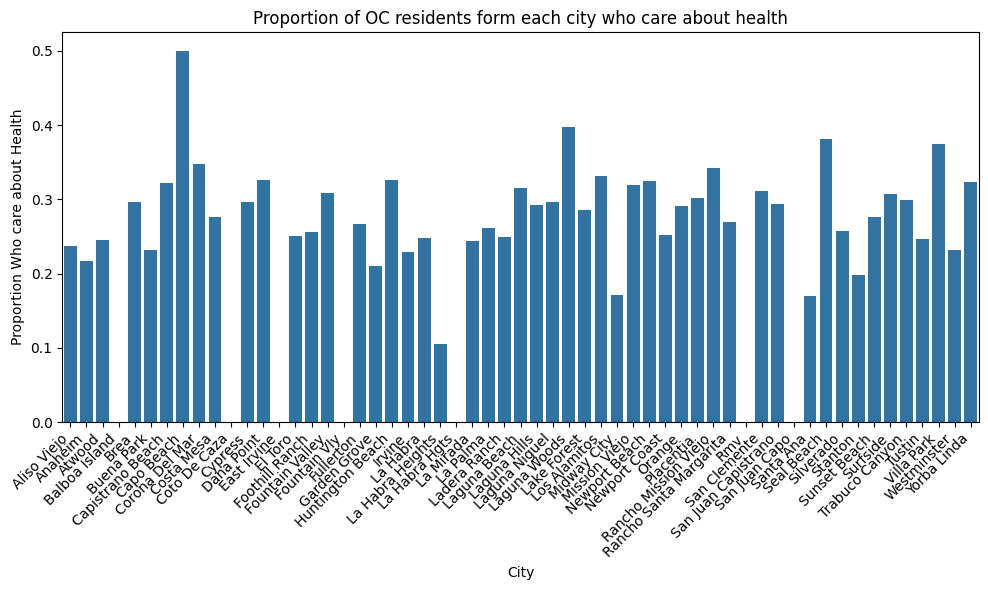

In [89]:
consumer_df_agg = consumer_df_new_1
consumer_df_agg['Health']  = consumer_df_new_1['Health'].apply(lambda x:1 if x == 'Y' else 0).astype(int)
consumer_df_agg['Religious']  = consumer_df_new_1['Religious'].apply(lambda x:1 if x == 'Y' else 0).astype(int)


count = consumer_df_agg.groupby('City').agg({'Health': 'count'})
                                                #, 'proportion': lambda x: x.sum() / x.count()})
summ = consumer_df_agg.groupby('City').agg({'Health': 'sum'})

sum_and_count = pd.concat([count,summ],axis=1)
sum_and_count.columns = ['count','sum']

sum_and_count['prop'] = sum_and_count['sum']/ sum_and_count['count']

sum_and_count
plt.figure(figsize=(10, 6))
ax = sns.barplot(x= sum_and_count.index,y=sum_and_count['prop'])
ax.set(xlabel ="City", ylabel = "Proportion Who care about Health", title ='Proportion of OC residents form each city who care about health')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

In [ ]:
def color_grad(value):
    blue = (0, 0, 1)

    # Red color (0.8)
    red = (1, 0, 0)

    # Interpolate between blue and red based on the value
    r = blue[0] + (red[0] - blue[0]) * ((value - 0.29) / (0.8 - 0.29))
    g = blue[1] + (red[1] - blue[1]) * ((value - 0.29) / (0.8 - 0.29))
    b = blue[2] + (red[2] - blue[2]) * ((value - 0.29) / (0.8 - 0.29))



    return (r, g, b)

In [94]:


orange_county = gpd.read_file('/content/drive/MyDrive/Datathon/City.shp')


fig, ax = plt.subplots(figsize=(10, 10))
colors = [color_grad(sum_and_count['prop'][city])  if city in sum_and_count.index else 'white' for city in orange_county['District']]

orange_county.plot(ax=ax, color=colors, edgecolor='black')




norm = mcolors.Normalize(vmin=0.29, vmax=0.8)
cmap = plt.cm.get_cmap('RdPu_r').reversed()
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

ax.set_title('Orange County Health Advocacy ')


for x, y, label in zip(orange_county.geometry.centroid.x, orange_county.geometry.centroid.y, orange_county['District']):
    ax.text(x, y, label + ' '+ str('{:.1%}'.format(sum_and_count['prop'][label])) if label in sum_and_count.index else '', fontsize=8)


cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.03)
cbar.set_label('Color Key')

plt.show()




ERROR:fiona._env:Unable to open /content/drive/MyDrive/Datathon/City.shx or /content/drive/MyDrive/Datathon/City.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.


DriverError: Unable to open /content/drive/MyDrive/Datathon/City.shx or /content/drive/MyDrive/Datathon/City.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

##Modeling Religion By City

In [ ]:
def color_grad(value):
    yellow = (1, 1, 0)

    # Red color (0.8)
    red = (1, 0, 0)

    # Interpolate between yellow and red based on the value
    r = yellow[0] + (red[0] - yellow[0]) * ((value - 0.2) / (0.8 - 0.2))
    g = yellow[1] + (red[1] - yellow[1]) * ((value - 0.2) / (0.8 - 0.2))
    b = yellow[2] + (red[2] - yellow[2]) * ((value - 0.2) / (0.8 - 0.2))

    return (r, g, b)

In [ ]:
#religion plots per city

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

consumer_df_new_1['Religious'] = consumer_df_new_1['Religious'].apply(lambda x: 1 if x == 'Y' else 0)

count = consumer_df_new_1.groupby('City').agg({'Religious': 'count'})
                                                #, 'proportion': lambda x: x.sum() / x.count()})
summ = consumer_df_new_1.groupby('City').agg({'Religious': 'sum'})

sum_and_count = pd.concat([count,summ],axis=1)
sum_and_count.columns = ['count','sum']



sum_and_count['prop'] = sum_and_count['sum']/ sum_and_count['count']



orange_county = gpd.read_file('City.shp')

     # Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
colors = [color_grad(sum_and_count['prop'][city])  if city in sum_and_count.index else 'white' for city in orange_county['District']]

orange_county.plot(ax=ax, color=colors, edgecolor='black')



norm = mcolors.Normalize(vmin=0.2, vmax=0.6)  # Adjust vmin and vmax according to your data range
cmap = plt.cm.get_cmap('RdPu_r').reversed()  # Reverse the colormap to go from purple to red
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

ax.set_title('Orange County Health Advocacy ')

#     # Add city names
for x, y, label in zip(orange_county.geometry.centroid.x, orange_county.geometry.centroid.y, orange_county['District']):
    ax.text(x, y, label + ' '+ str('{:.1%}'.format(sum_and_count['prop'][label])) if label in sum_and_count.index else '', fontsize=8)

#     # Add colorbar
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.03)
cbar.set_label('Color Key')

plt.show()



##Net worth by Health Concern

In [ ]:
#consumer_df_new_1['Wealth'] = consumer_df_new_1['NetWorth'].apply(lambda x: 2 if x >= 1 and x <=3 else 1 if x >=4 and x <=7 else 0)



count = consumer_df_new_1.groupby('NetWorth').agg({'Health': 'count'})
                                                #, 'proportion': lambda x: x.sum() / x.count()})
summ = consumer_df_new_1.groupby('NetWorth').agg({'Health': 'sum'})

sum_and_count = pd.concat([count,summ],axis=1)
sum_and_count.columns = ['count','sum']



sum_and_count['prop'] = sum_and_count['sum']/ sum_and_count['count']


sns.barplot(x=sum_and_count.index,y=sum_and_count['prop'])

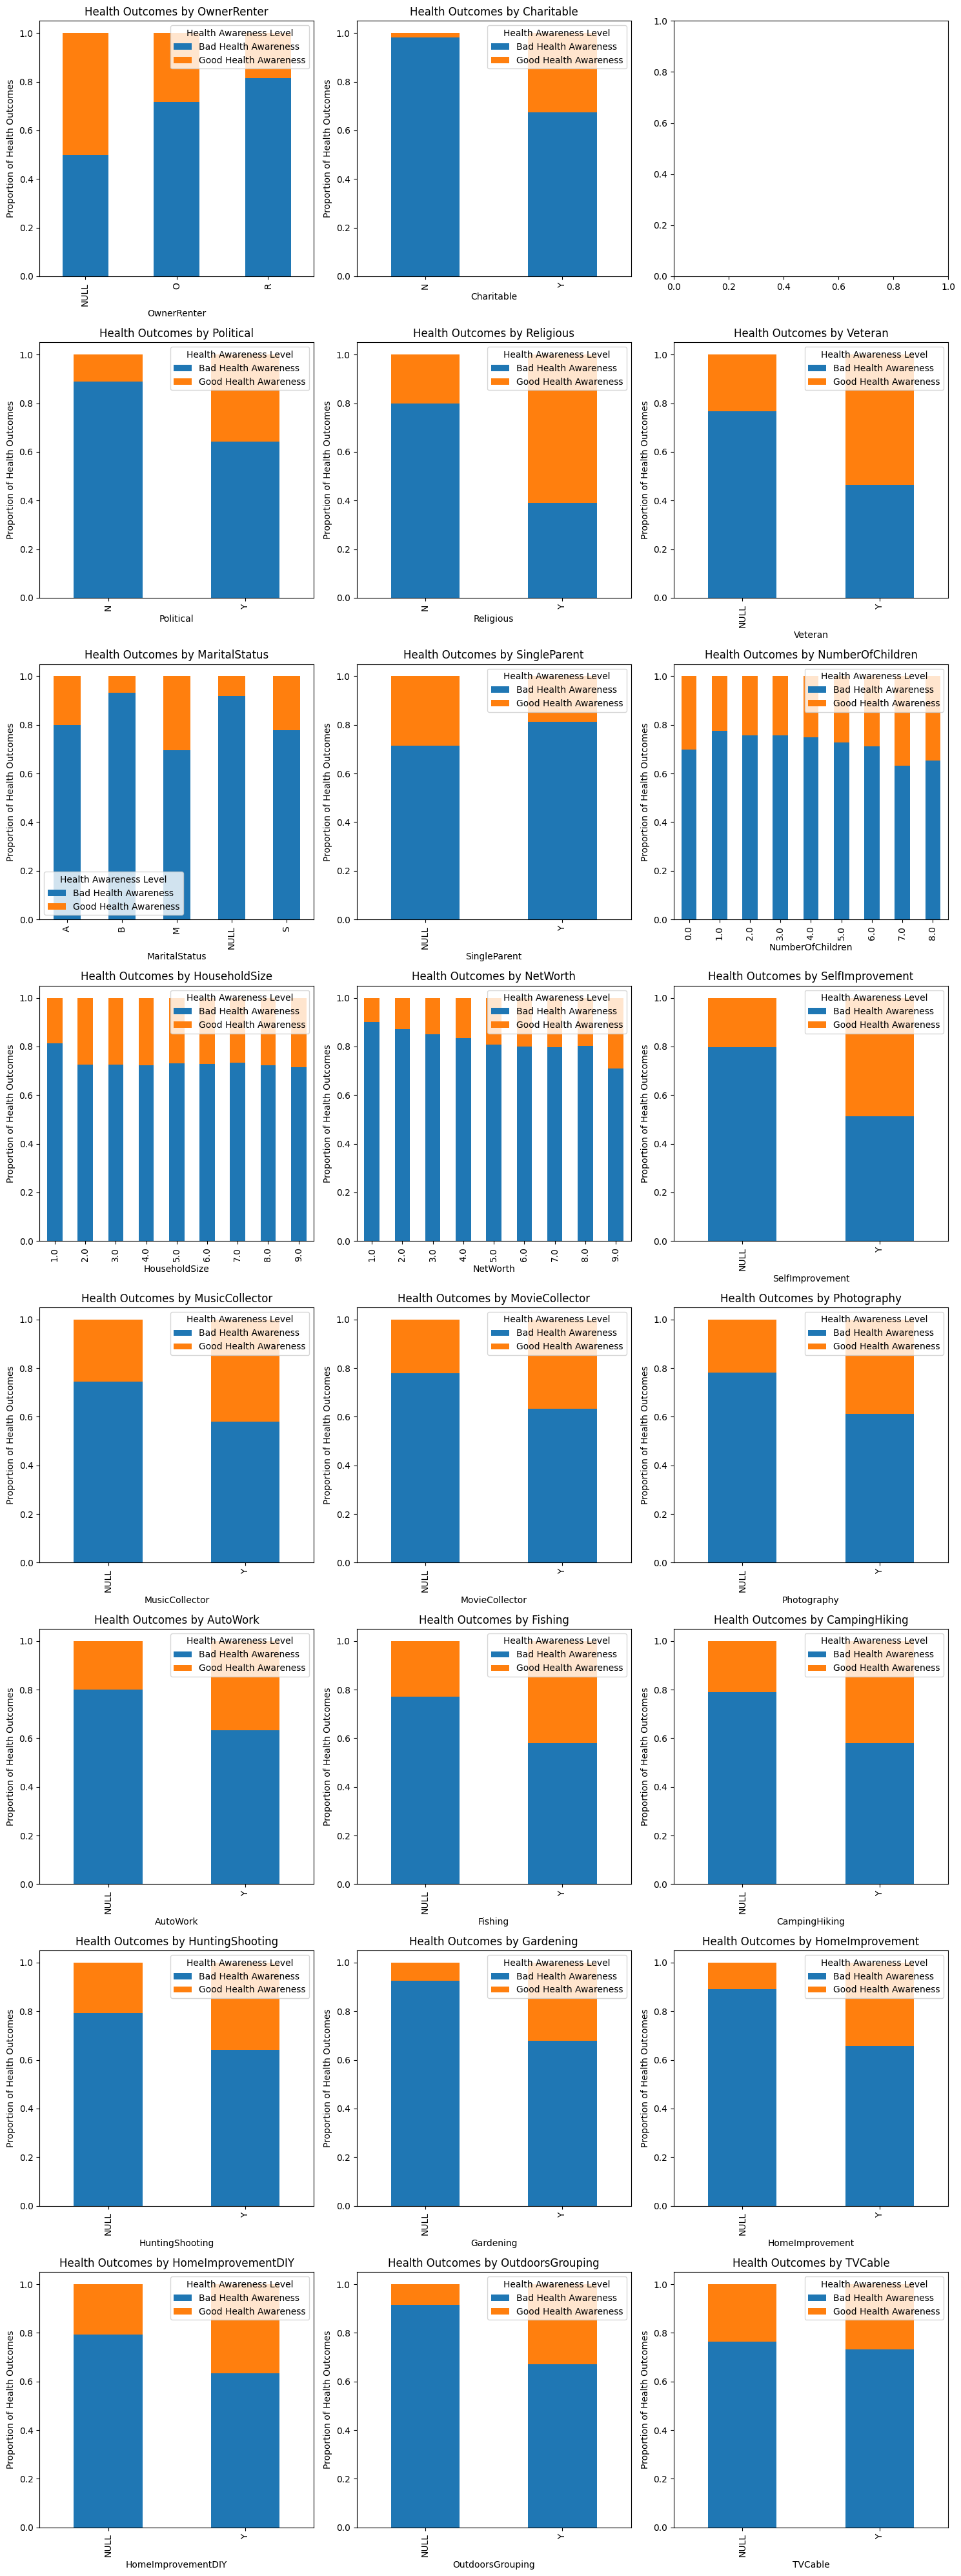

In [ ]:
consumer_df_new_2 = consumer_df_new_1.drop(columns = ['City', 'Longitude', 'Latitude', 'Zipcode'])
consumer_df_new_2 = consumer_df_new_2.replace({-1: 'NULL'})

def plot_binary_health_relations(df, columns):
    # Determine the layout of the subplots
    num_columns = len(columns)
    num_rows = int(np.ceil(num_columns / 3))  # Adjust the number of rows here as needed
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, column in enumerate(columns):
      if column != 'Health':
        health_proportions = df.groupby(column)['Health'].value_counts(normalize=True).unstack()
        health_proportions.plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_title(f'Health Outcomes by {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Proportion of Health Outcomes')
        axes[i].legend(title='Health Awareness Level', labels=['Bad Health Awareness', 'Good Health Awareness'])

    plt.tight_layout()
    plt.show()

# Example usage:
columns = consumer_df_new_2.columns.tolist()
plot_binary_health_relations(consumer_df_new_2, columns)


# Data Cleaning

In [ ]:
consumer_df_new_1['OwnerRenter'] = consumer_df_new_1['OwnerRenter'].apply(lambda x:1 if x == 'O' else 0).astype(int)

In [ ]:
consumer_df_new_1.replace({'Y':1, 'N':0}, inplace=True)

In [ ]:
consumer_df_new_1['Zipcode'] = consumer_df_new_1['Zipcode'].astype(str)

In [ ]:
consumer_df_new_1['MaritalStatus'] = consumer_df_new_1['MaritalStatus'].apply(lambda x: 1 if x == 'M' else (2 if x == 'S' else (3 if x == 'A' else 4))).astype(int)

In [ ]:
consumer_df_new_1.head()

,City,Zipcode,Latitude,Longitude,OwnerRenter,Charitable,Health,Political,Religious,Veteran,MaritalStatus,SingleParent,NumberOfChildren,HouseholdSize,NetWorth,SelfImprovement,MusicCollector,MovieCollector,Photography,AutoWork,Fishing,CampingHiking,HuntingShooting,Gardening,HomeImprovement,HomeImprovementDIY,OutdoorsGrouping,TVCable
0,La Habra,90631,33.929670,-117.942216,0,1,0,0,1,-1,2,1,2.0,5.0,4.0,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1
5,Costa Mesa,92626,33.690815,-117.934015,1,1,1,1,0,-1,1,-1,1.0,4.0,9.0,-1,-1,-1,1,1,-1,-1,-1,1,1,1,1,1
6,Costa Mesa,92626,33.689049,-117.903661,1,1,1,1,1,1,1,-1,0.0,2.0,9.0,-1,1,1,1,1,-1,-1,-1,1,1,1,1,1
7,Capistrano Beach,92624,33.462028,-117.673180,1,1,1,1,0,-1,1,-1,1.0,3.0,8.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
10,Costa Mesa,92626,33.695621,-117.897087,1,1,0,0,0,-1,1,-1,0.0,5.0,9.0,-1,1,-1,-1,-1,1,-1,1,-1,1,-1,1,1


In [ ]:
consumer_df_new_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1182872 entries, 0 to 2089789
Data columns (total 28 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   City                1182872 non-null  object 
 1   Zipcode             1182872 non-null  object 
 2   Latitude            1182872 non-null  float64
 3   Longitude           1182872 non-null  float64
 4   OwnerRenter         1182872 non-null  int64  
 5   Charitable          1182872 non-null  int64  
 6   Health              1182872 non-null  int64  
 7   Political           1182872 non-null  int64  
 8   Religious           1182872 non-null  int64  
 9   Veteran             1182872 non-null  int64  
 10  MaritalStatus       1182872 non-null  int64  
 11  SingleParent        1182872 non-null  int64  
 12  NumberOfChildren    1182872 non-null  float64
 13  HouseholdSize       1182872 non-null  float64
 14  NetWorth            1182872 non-null  float64
 15  SelfImprovement     

In [ ]:
result_df = consumer_df_new_1

In [ ]:
# result_df.to_csv('melissaData.csv', index=False)

In [ ]:
result_df.drop(columns = ['City', 'Longitude', 'Latitude'], inplace = True)

In [ ]:
result_df = pd.get_dummies(result_df, columns=['Zipcode'], drop_first = True)
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1182872 entries, 0 to 2089789
Columns: 162 entries, OwnerRenter to Zipcode_92887
dtypes: bool(138), float64(3), int64(21)
memory usage: 381.3 MB


# Binary Logistic Regression Classification Model

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = result_df.drop(columns = 'Health')
y = result_df['Health']

X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))


Accuracy 77.73757431066083 %


<Axes: >

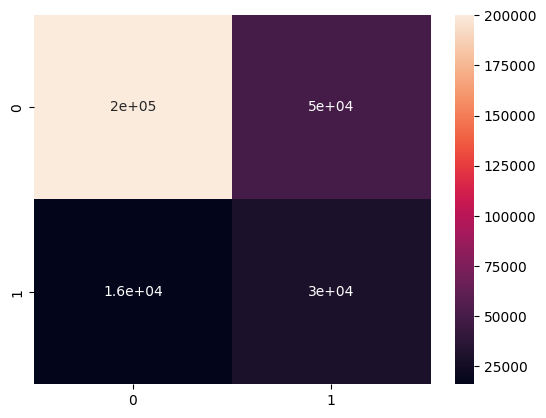

In [ ]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86    216346
           1       0.65      0.37      0.47     79372

    accuracy                           0.78    295718
   macro avg       0.72      0.65      0.67    295718
weighted avg       0.76      0.78      0.76    295718



In [ ]:
result_df['Health'].value_counts()

Health
0    867301
1    315571
Name: count, dtype: int64

# Binary Neural Network Classification Model

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import load_model
# model = load_model('/content/drive/MyDrive/Datathon/model.h5')


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=500, activation='relu', input_shape=(161, )),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
epochs_hist = model.fit(X_train, y_train, epochs = 5, batch_size = 10000)


TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 161], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │        81,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,515,005 (9.59 MB)

 Trainable params: 837,001 (3.19 MB)

 Non-trainable params: 4,000 (15.62 KB)

 Optimizer params: 1,674,004 (6.39 MB)

In [ ]:
y_pred = model.predict(X_test)


9242/9242 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step


In [ ]:
y_pred = (y_pred > 0.5)

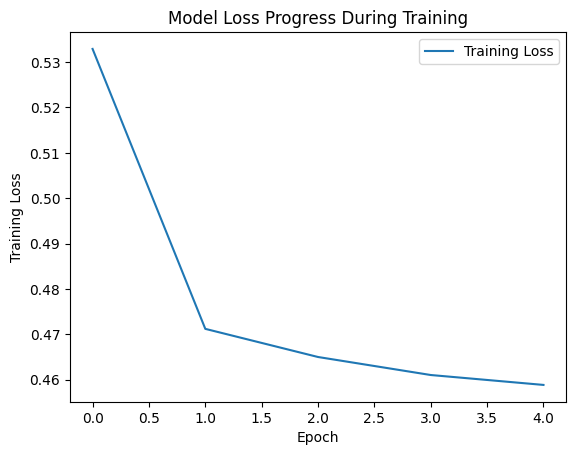

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

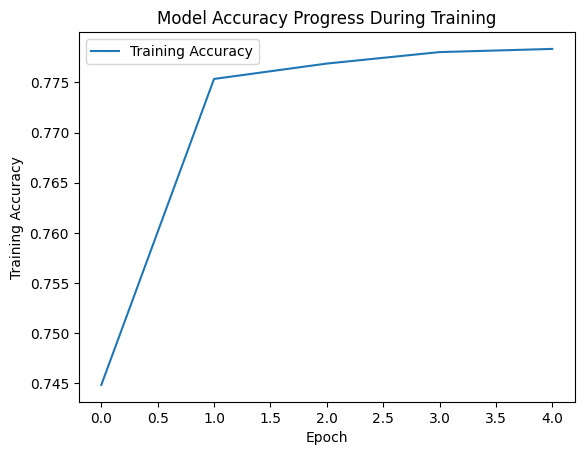

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

<AxesSubplot:>

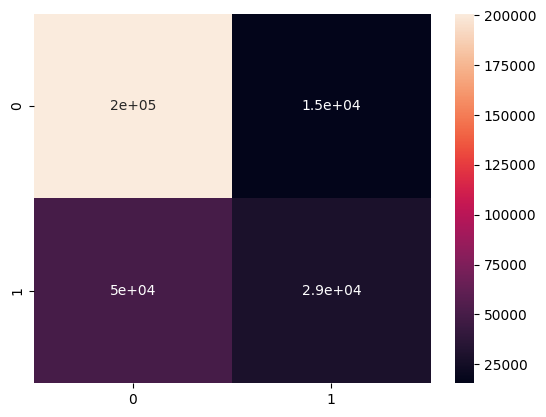

In [ ]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86    216346
           1       0.65      0.37      0.47     79372

    accuracy                           0.78    295718
   macro avg       0.73      0.65      0.67    295718
weighted avg       0.76      0.78      0.76    295718



In [ ]:
# Save the model to a file
# model.save('model.h5')
